In [16]:
import pandas as pd
from igraph import Graph, plot, RainbowPalette
import matplotlib.pyplot as plt

In [17]:
# Load the data
city_name = 'Jennings'
nodes_edges_name = 'users&bgt'

nodes = pd.read_csv(f'nodes_and_edges/{city_name}_{nodes_edges_name}_nodes.csv')
edges = pd.read_csv(f'nodes_and_edges/{city_name}_{nodes_edges_name}_edges.csv')

In [18]:
# Create the graph
net = Graph.DataFrame(edges, directed=True, use_vids=False, vertices=nodes)

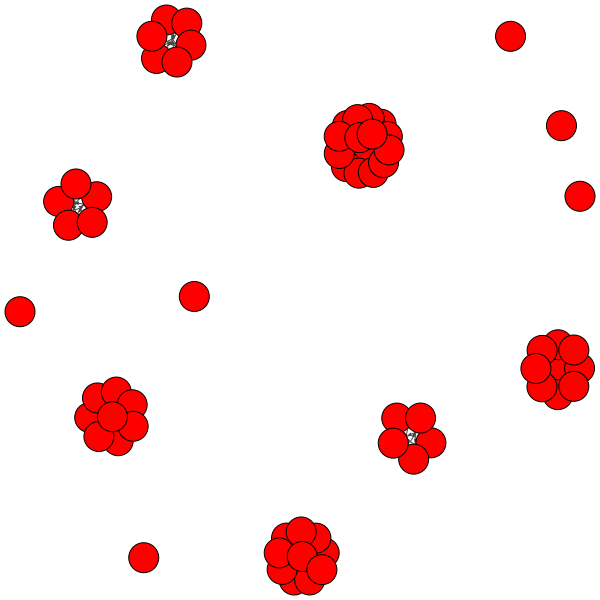

In [19]:
plot(net, edge_arrow_size=0.4, vertex_size=30)

In [20]:
# Density: The proportion of present edges from all possible edges in the network
edge_density = net.density(loops=False)
print(f"Density: {edge_density:0.4f}")
print(f"or... {net.ecount() / (net.vcount() * (net.vcount() - 1)):0.4f}")

Density: 0.1343
or... 0.1343


In [21]:
# Diameter: longest geodesic distance (eccentricity) between any two vertices in the network
diameter_undirected = net.diameter(directed=False, weights=None)
print(f"Undirected diameter: {diameter_undirected}")
diameter_directed = net.diameter(directed=True, weights=None)
print(f"Directed diameter: {diameter_directed}")
diameter_weighted = net.diameter(directed=False, weights="weight")
print(f"Weighted undirected diameter: {diameter_weighted}")

Undirected diameter: 1
Directed diameter: 1
Weighted undirected diameter: 1.0


Text(0.5, 1.0, 'Histogram of node degree')

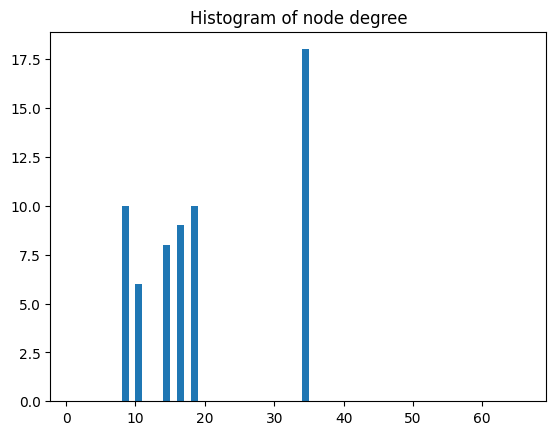

In [22]:
# Node degrees: how many edges are connected to a node
# The mode="ALL" parameter means that it calculates the total degree, considering both incoming and outgoing edges for directed graphs
deg = net.degree(mode="ALL")

# check the distribution of the degrees
ax = plt.hist(deg, bins=range(1, net.vcount()))
plt.title("Histogram of node degree")

In [23]:
# Closeness: proximity of a node to all other nodes in a network.)
# Inverse of the node’s average geodesic distance to others in the network.
# can also be calculated with weights

closeness = net.closeness(mode="ALL", weights=None)

# <node, closeness> pairs
pd.DataFrame({"name": net.vs["name"], "closeness": closeness}).sort_values("closeness", ascending=False)

,name,closeness
0,mKBl4fAqTfNts7B78aOPVg,1.0
35,tt5gvIjsPjknaKSNoiseSg,1.0
37,9W5o1uCqYH8uXs0aeC0gng,1.0
38,IQsWpHccX7I6giIGbGx7GQ,1.0
39,YFxFTn8xUXkl-zhqlESMBw,1.0
...,...,...
10,RDo62yK9UyPtEmzC9p7Oyg,NaN
13,YxNNbKHNx5_RMcC40QSJ-A,NaN
17,2vEpqNWaN-fZ8M63SySODQ,NaN
42,NW4aI5nz9blcboQNngMDYA,NaN


In [24]:
# Betweenness (centrality based on a broker position connecting others) - Number of geodesics that pass through the node or the edge. The higher, the more important the node is.
betweenness = net.betweenness(directed=True, weights=None)
# <node, betweenness> pairs
pd.DataFrame({"name": net.vs["name"], "betweenness": betweenness}).sort_values("betweenness", ascending=False)

,name,betweenness
0,mKBl4fAqTfNts7B78aOPVg,0.0
50,z7NnbVwYPe3olm_UBRn14A,0.0
36,0pao5mV7jHfkTx1Py8YE_A,0.0
37,9W5o1uCqYH8uXs0aeC0gng,0.0
38,IQsWpHccX7I6giIGbGx7GQ,0.0
...,...,...
28,ikDYSP8y2J0mw6L22twWnQ,0.0
29,SAyc6gRZ9zxsyTBWrE_Nkw,0.0
30,mTYYS_2oUX8mHERN4JZ-0A,0.0
31,xuiKXdLqy1xrmlvCEL7EHg,0.0


In [25]:
# we can also calculate the betweenness for edges
# measures the importance of edges in facilitating the flow of information between nodes.
edge_betweenness = net.edge_betweenness(directed=True, weights=None)
edge_betweenness

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [26]:
# Average path length: the mean of the shortest distance between each pair of nodes in the network (in both directions for directed graphs).
mean_dist_undirected = net.average_path_length(directed=False)
print(f"Average path length (undirected)= {mean_dist_undirected:.3f}")

mean_dist_directed = net.average_path_length(directed=True)
print(f"Average path length (directed)= {mean_dist_directed:.3f}")

Average path length (undirected)= 1.000
Average path length (directed)= 1.000


In [27]:
homophily = net.assortativity_degree(directed=False)

print(f"All network = {homophily:.3f}")

All network = 1.000


In [28]:
# Community detection based on edge betweenness (Newman-Girvan)
# High-betweenness edges are removed sequentially (recalculating at each step) and the best partitioning of the network is selected.
communities = net.community_edge_betweenness() 
communities = communities.as_clustering() # just for ease of use

# coloring the nodes based on the community they belong to
num_communities = len(communities)
palette = RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    net.vs[community]["color"] = i
    community_edges = net.es.select(_within=community)
    community_edges["color"] = i

In [29]:
for i, community in enumerate(communities):
    print(net.vs[community]['name'])

['mKBl4fAqTfNts7B78aOPVg', 'bnVzSHI48lEHPaEzZNIqJg', '5AfZjChiQ3xMJDtSgwIyWA', '8o5qyA1Axxnp0YREKE2hFA', '55NM98uFBptY9NDlvLXikg', 'jTp8rRtsFoq01Juv2R0pzw', 'LPcgvhiZYoPF60YbG2TcvA', 'QPS9NVkBuSuHjK3cTLbyMw', 'HnziyG9F5PxAscAgrbaqOA', 'e15MFHa46RwR4J7hQFNeQQ']
['mIhyBkwPmOBymkDN_zZzxw', 'ipjlD-L4w_ktG05iJECxlg', 'ikDYSP8y2J0mw6L22twWnQ', '0pao5mV7jHfkTx1Py8YE_A', 'IQsWpHccX7I6giIGbGx7GQ', 'bEWmzGhxzOT0RZSadlzbog']
['HR5TCqAjP9rlM_n_BA0JfA', 'ybc05luhM2JQiO6hT0kt2A', 'HL6sLHx2nyKFos471H1JyQ', 'ROdQcyL8H7BnK0h3-cG9BQ', 'x21qazD-sSJKNX7y0zSWOg', 'h3S3vzF8H5VmPNUzfPLCag', 'ACTPdn2LptJs-_h2otioZg', 'Wnuy1CGp4KCkaR9OY8QKjA']
['VnmLtJXW8uselY1cXx8a4w']
['vJH0qpV7sTxVHlH7n8iUXA', 'vG73PwW2u43An4_b4CGSuA', 'nZhmPaZrHgF4N1shnL3T6g', 'FpZQNN3d0c06eozeLYbqTQ', '31N3UJj6j8D7zKxFaSVyXw', 'DesdS3JFnf2eHfJd7qAiPw', 'xlgssuC3d-IN2-jfXfwm5A', 'mNYpkSBZATDyKMbDEDyoOA', 'vHsb8W0HLgd30wcvmBOdHw']
['tfO6iJOET3RdOJhm40jUGQ', 'ERFfbEWAeqEF91ipoaUu6w', '6zdHISU9sX7DV9uC6f2vvg', 'VD1zLrgNBcztR10sTpNm3g', 'm0KA2

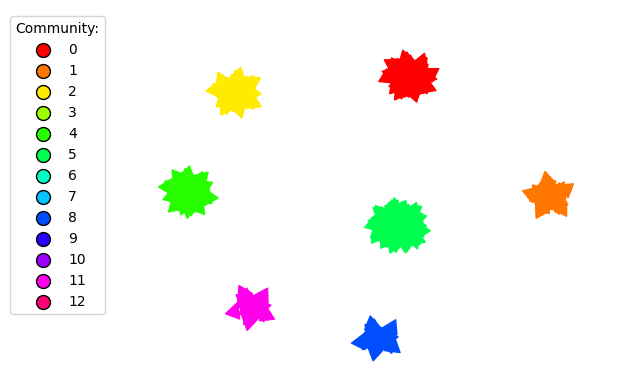

In [30]:
fig, ax = plt.subplots()
plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()